In [1]:
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the input image
input_image_path = '/content/drive/My Drive/cat.jpg'  # Update with the actual path to your image
try:
    input_image = cv2.imread(input_image_path)
    if input_image is None:
        raise FileNotFoundError("Input image not found or unable to load.")
    else:
        print("Input image loaded successfully.")
        print("Image type:", type(input_image))
        print("Image shape:", input_image.shape)
except Exception as e:
    print("Error loading input image:", e)
    exit()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Input image loaded successfully.
Image type: <class 'numpy.ndarray'>
Image shape: (1280, 1225, 3)


In [2]:
# Function for Run Length Encoding (RLE) compression
def rle_compress(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    compressed_image = np.zeros_like(gray_image)  # Initialize compressed image with zeros
    height, width = gray_image.shape

    # Iterate over the rows of the image
    for row in range(height):
        current_pixel = gray_image[row, 0]
        run_length = 1
        compressed_row = []

        # Iterate over the columns of the image
        for col in range(1, width):
            if gray_image[row, col] == current_pixel:
                run_length += 1
            else:
                compressed_row.append((current_pixel, run_length))
                current_pixel = gray_image[row, col]
                run_length = 1

        compressed_row.append((current_pixel, run_length))

        # Fill compressed image row with run-length encoded values
        index = 0
        for pixel, length in compressed_row:
            compressed_image[row, index:index+length] = pixel
            index += length

    return compressed_image

In [3]:
# Function for Discrete Cosine Transform (DCT) compression
def dct_compress(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    compressed_image = np.zeros_like(gray_image)

    # Define block size for DCT compression
    block_size = 8

    # Iterate over the blocks in the image
    for row in range(0, gray_image.shape[0], block_size):
        for col in range(0, gray_image.shape[1], block_size):
            block = gray_image[row:row+block_size, col:col+block_size].astype(np.float32)
            dct_block = cv2.dct(block)
            compressed_block = np.zeros_like(dct_block)
            compressed_block[:2, :2] = dct_block[:2, :2]  # Keep only low-frequency coefficients
            compressed_image[row:row+block_size, col:col+block_size] = cv2.idct(compressed_block)

    return compressed_image

In [4]:
# Function for Scalar Quantization compression
def scalar_quantization_compress(image):
    flattened_image = image.flatten()
    min_val = np.min(flattened_image)
    max_val = np.max(flattened_image)
    intervals = np.linspace(min_val, max_val, num=256)
    mean_values = (intervals[:-1] + intervals[1:]) / 2
    quantized_image = np.digitize(flattened_image, intervals, right=True)
    compressed_image = mean_values[quantized_image - 1].reshape(image.shape)
    return compressed_image

In [7]:
# Compress the input image using the three techniques
rle_compressed_image = rle_compress(input_image)
dct_compressed_image = dct_compress(input_image)
scalar_quantization_compressed_image = scalar_quantization_compress(input_image)

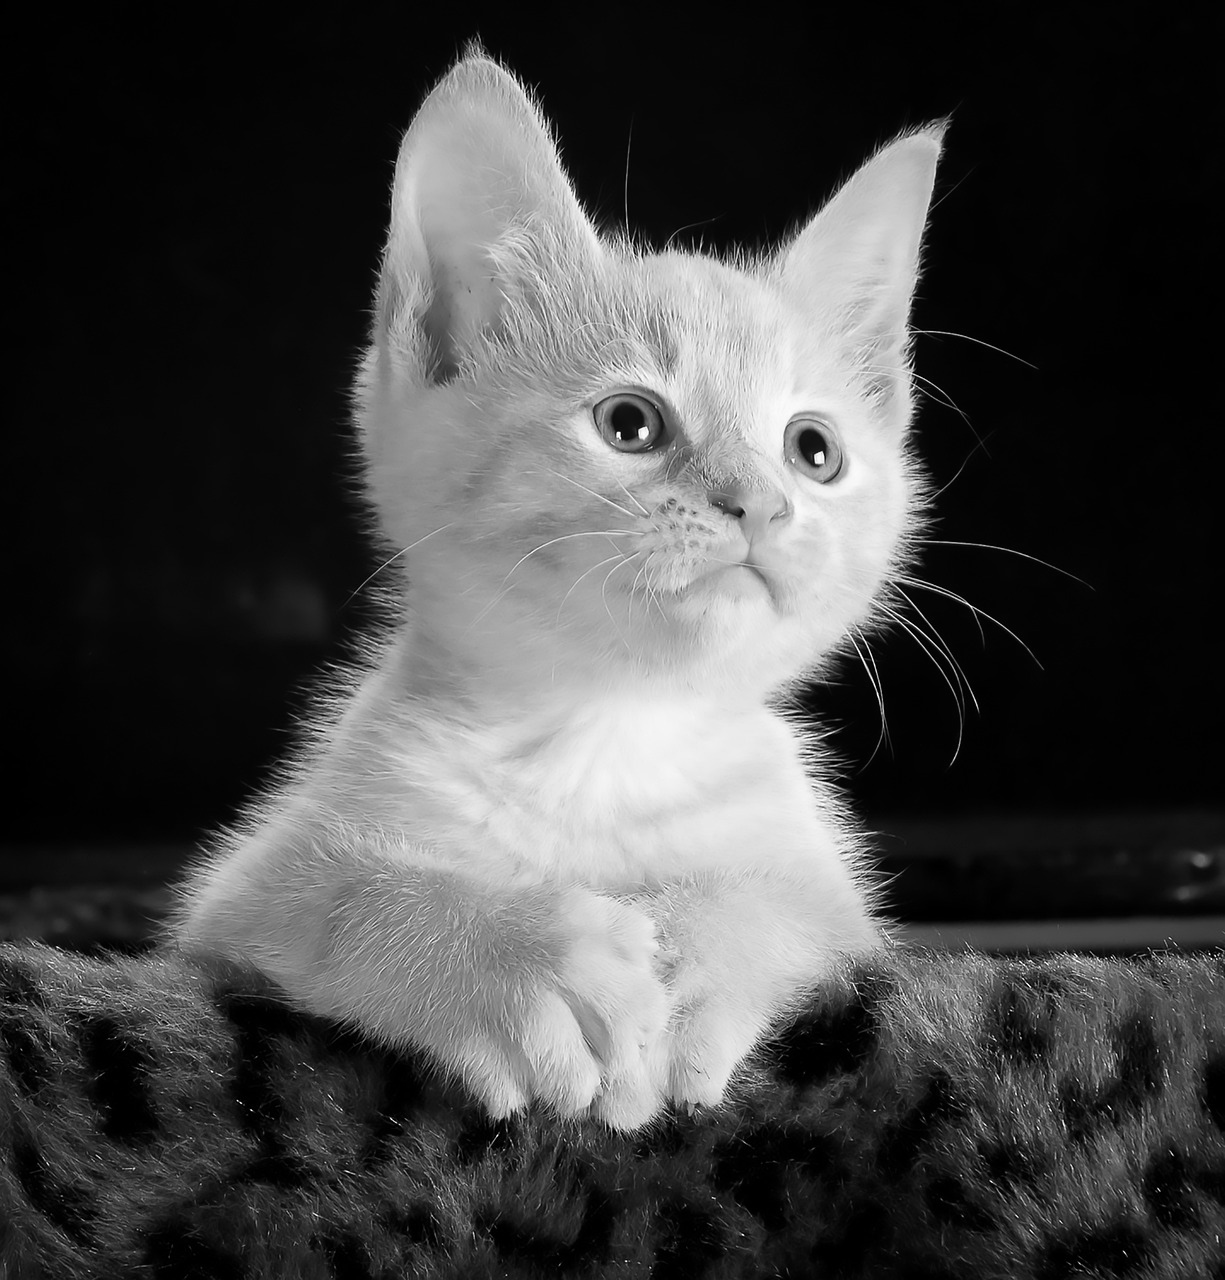

Compressed file size: 0.36 MB


In [10]:
from google.colab.patches import cv2_imshow
import os

# Calculate file size after compression
output_filename = 'rle_compressed_image.jpg'
cv2.imwrite(output_filename, rle_compressed_image)
compressed_file_size_bytes = os.path.getsize(output_filename)
compressed_file_size_mb = compressed_file_size_bytes / (1024 * 1024)  # Convert to MB

# Display the compressed image and file size using OpenCV
cv2_imshow(rle_compressed_image)
print(f'Compressed file size: {compressed_file_size_mb:.2f} MB')


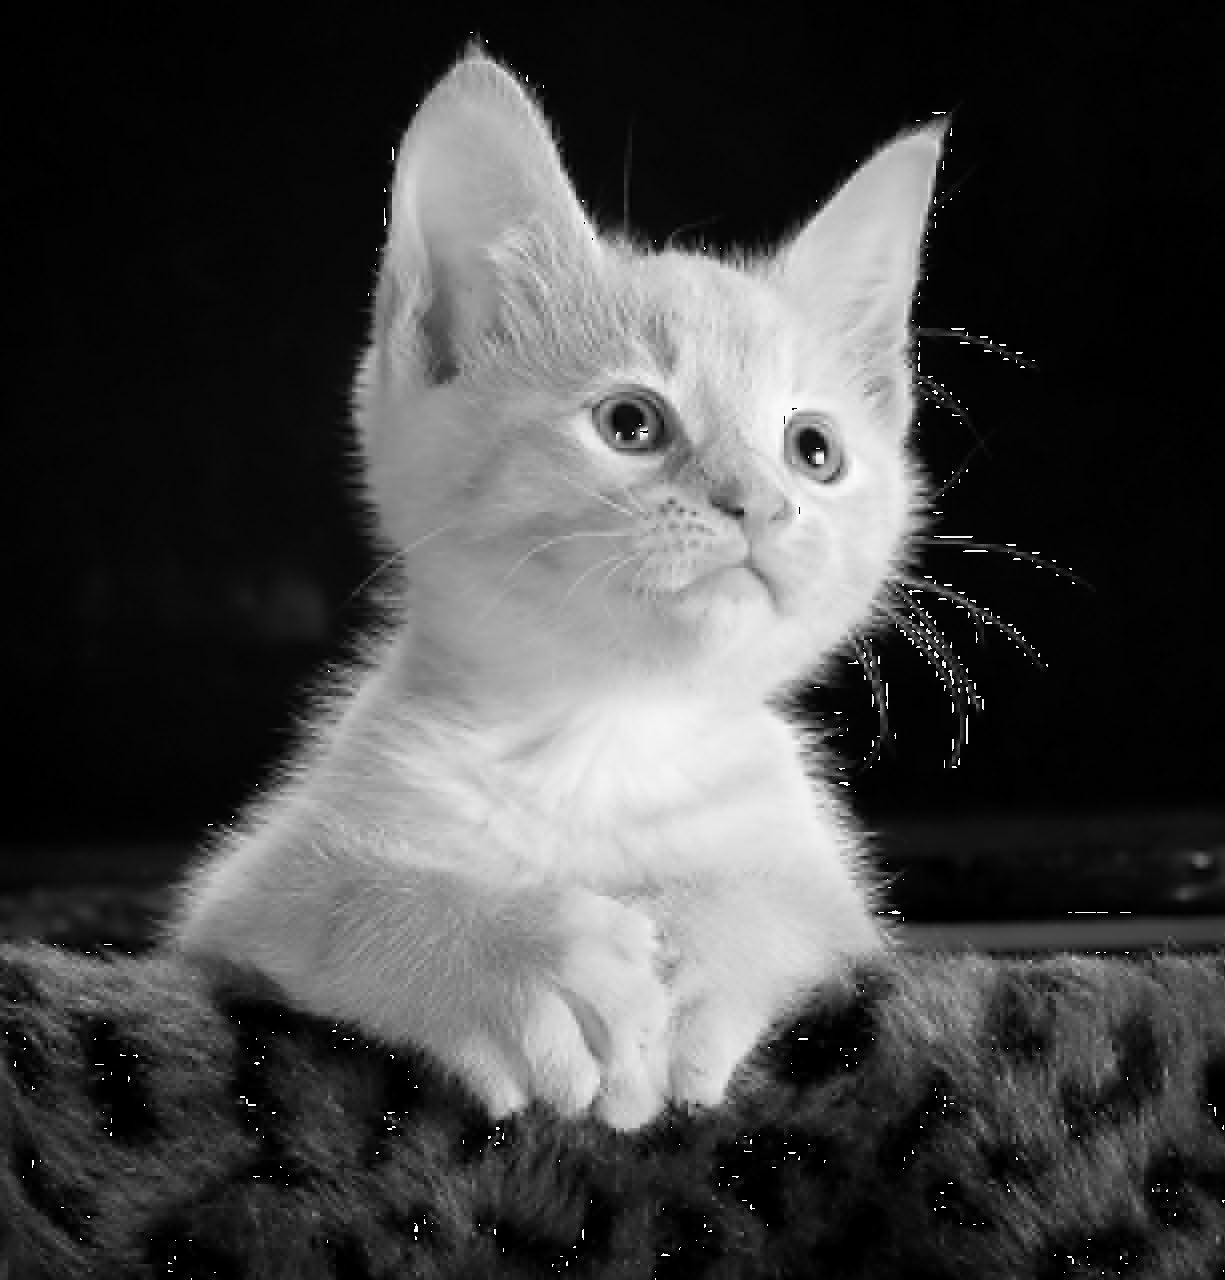

Compressed DCT file size: 0.13 MB


In [11]:
# Calculate file size after compression for DCT compressed image
output_dct_filename = 'dct_compressed_image.jpg'
cv2.imwrite(output_dct_filename, dct_compressed_image)
dct_compressed_file_size_bytes = os.path.getsize(output_dct_filename)
dct_compressed_file_size_mb = dct_compressed_file_size_bytes / (1024 * 1024)  # Convert to MB

# Display the compressed DCT image and file size using OpenCV
cv2_imshow(dct_compressed_image)
print(f'Compressed DCT file size: {dct_compressed_file_size_mb:.2f} MB')


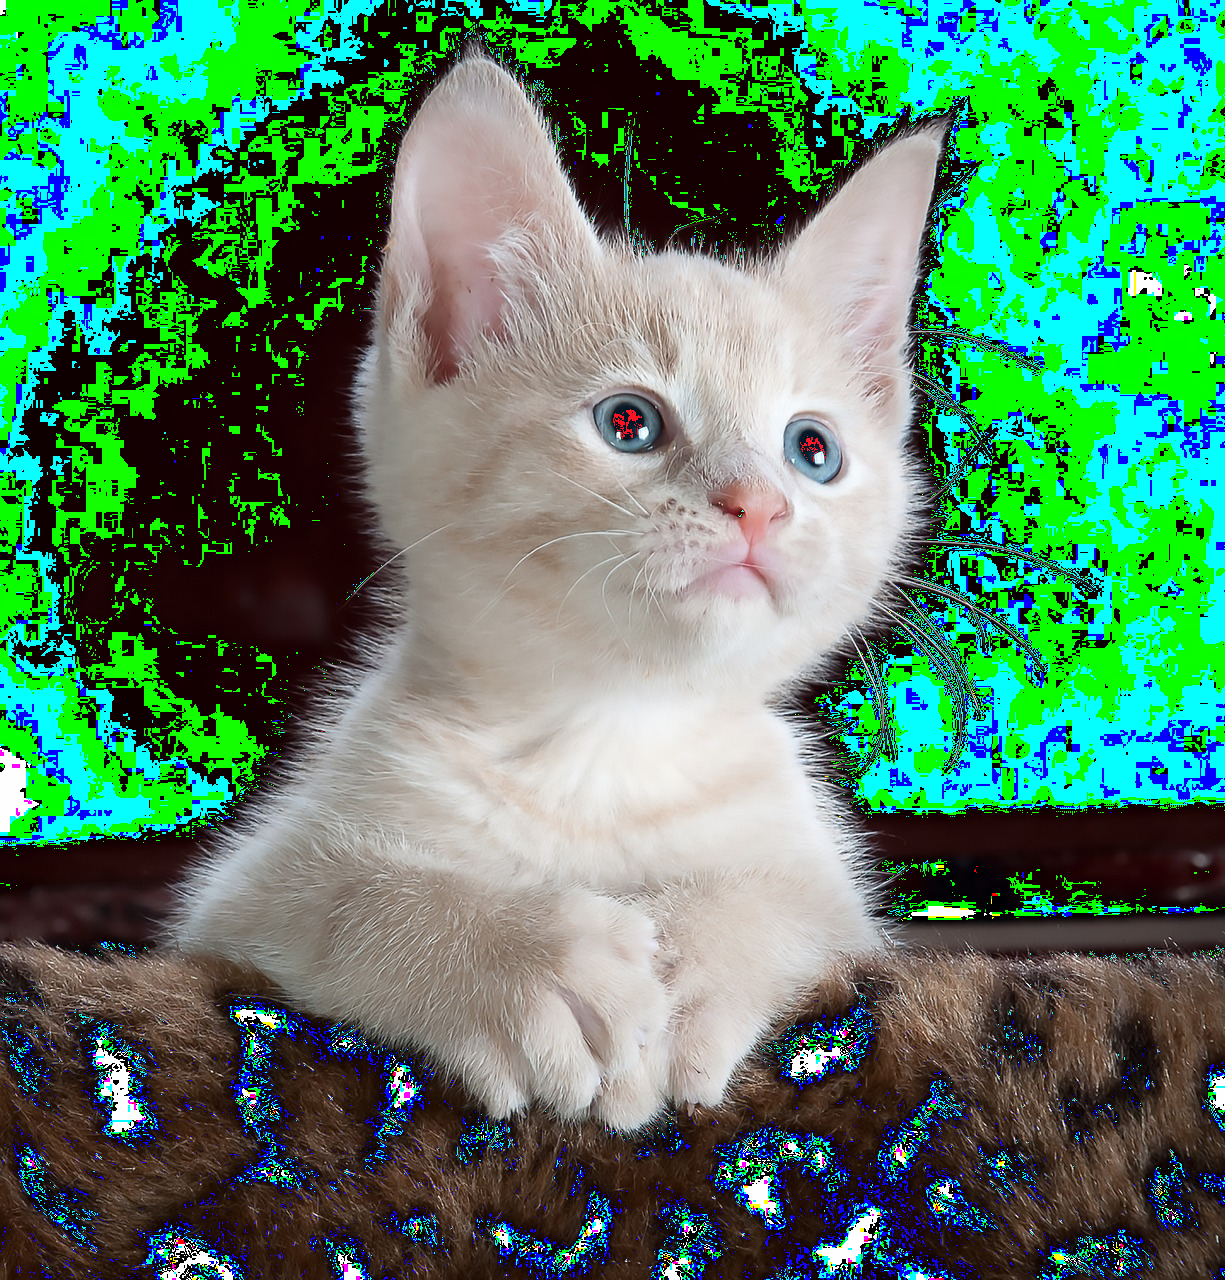

Compressed Scalar Quantization file size: 0.85 MB


In [12]:
# Calculate file size after compression for Scalar Quantization compressed image
output_scalar_quantization_filename = 'scalar_quantization_compressed_image.jpg'
cv2.imwrite(output_scalar_quantization_filename, scalar_quantization_compressed_image)
scalar_quantization_compressed_file_size_bytes = os.path.getsize(output_scalar_quantization_filename)
scalar_quantization_compressed_file_size_mb = scalar_quantization_compressed_file_size_bytes / (1024 * 1024)  # Convert to MB

# Display the compressed Scalar Quantization image and file size using OpenCV
cv2_imshow(scalar_quantization_compressed_image)
print(f'Compressed Scalar Quantization file size: {scalar_quantization_compressed_file_size_mb:.2f} MB')
